In [1]:
from PIL import Image, ImageEnhance

In [19]:
file_path = "test_images/image_3.png"

In [17]:
im = Image.open(file_path)

NameError: name 'Image' is not defined

## Manual

In [4]:
#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)
factor = 1 #gives original image
im_output = enhancer.enhance(factor)

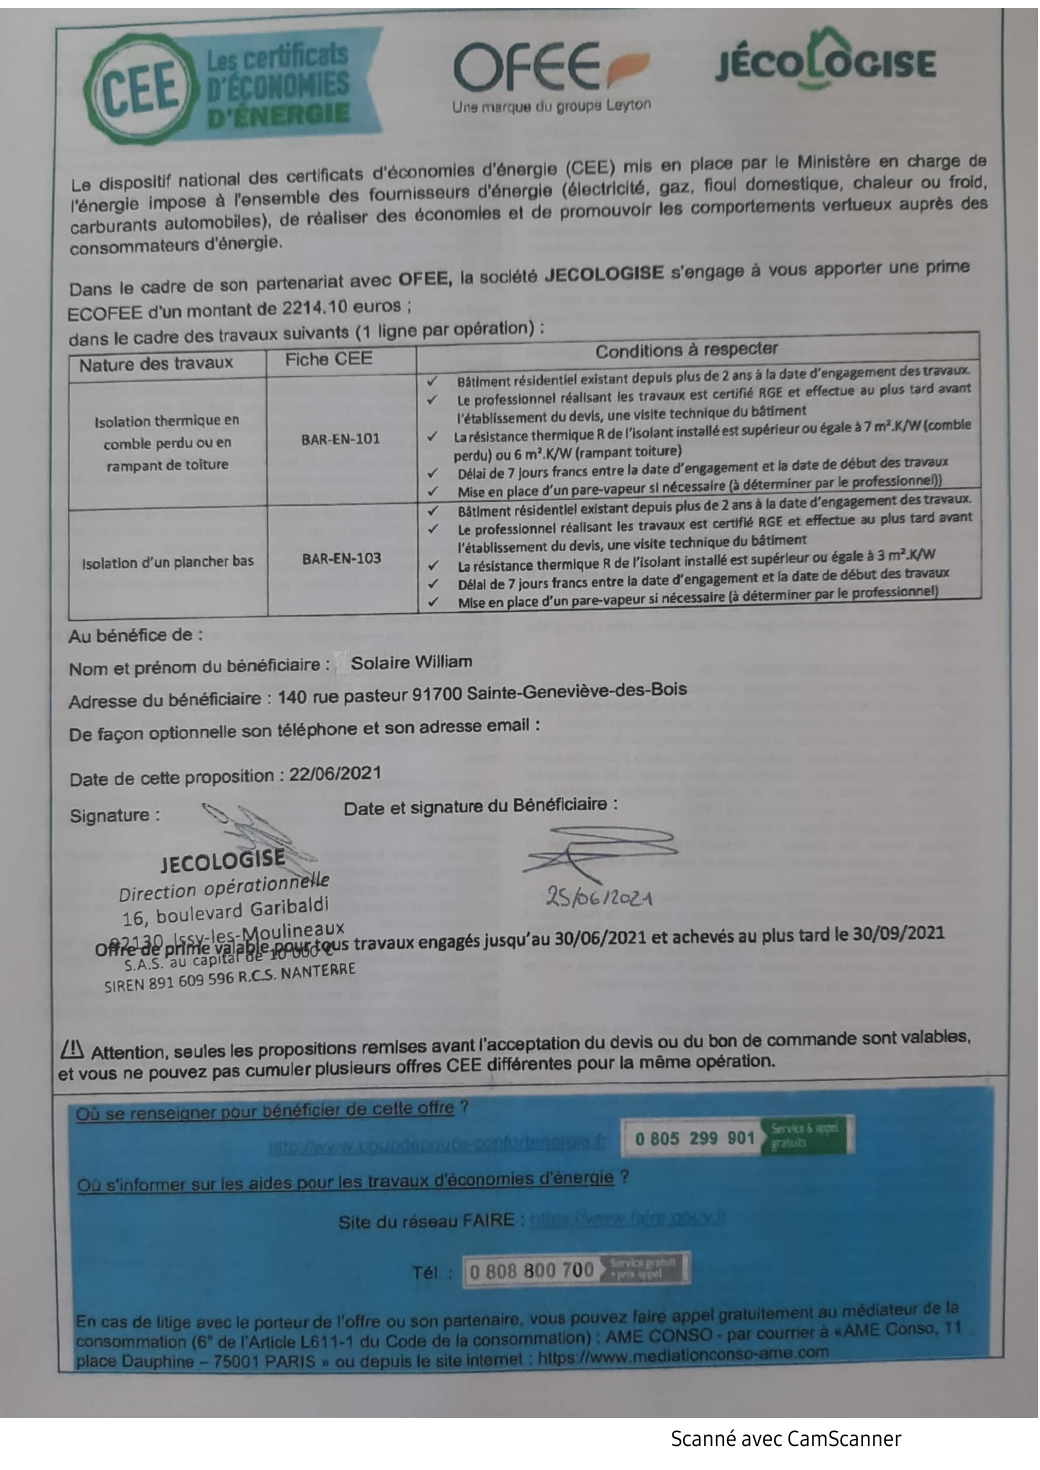

In [5]:
im_output

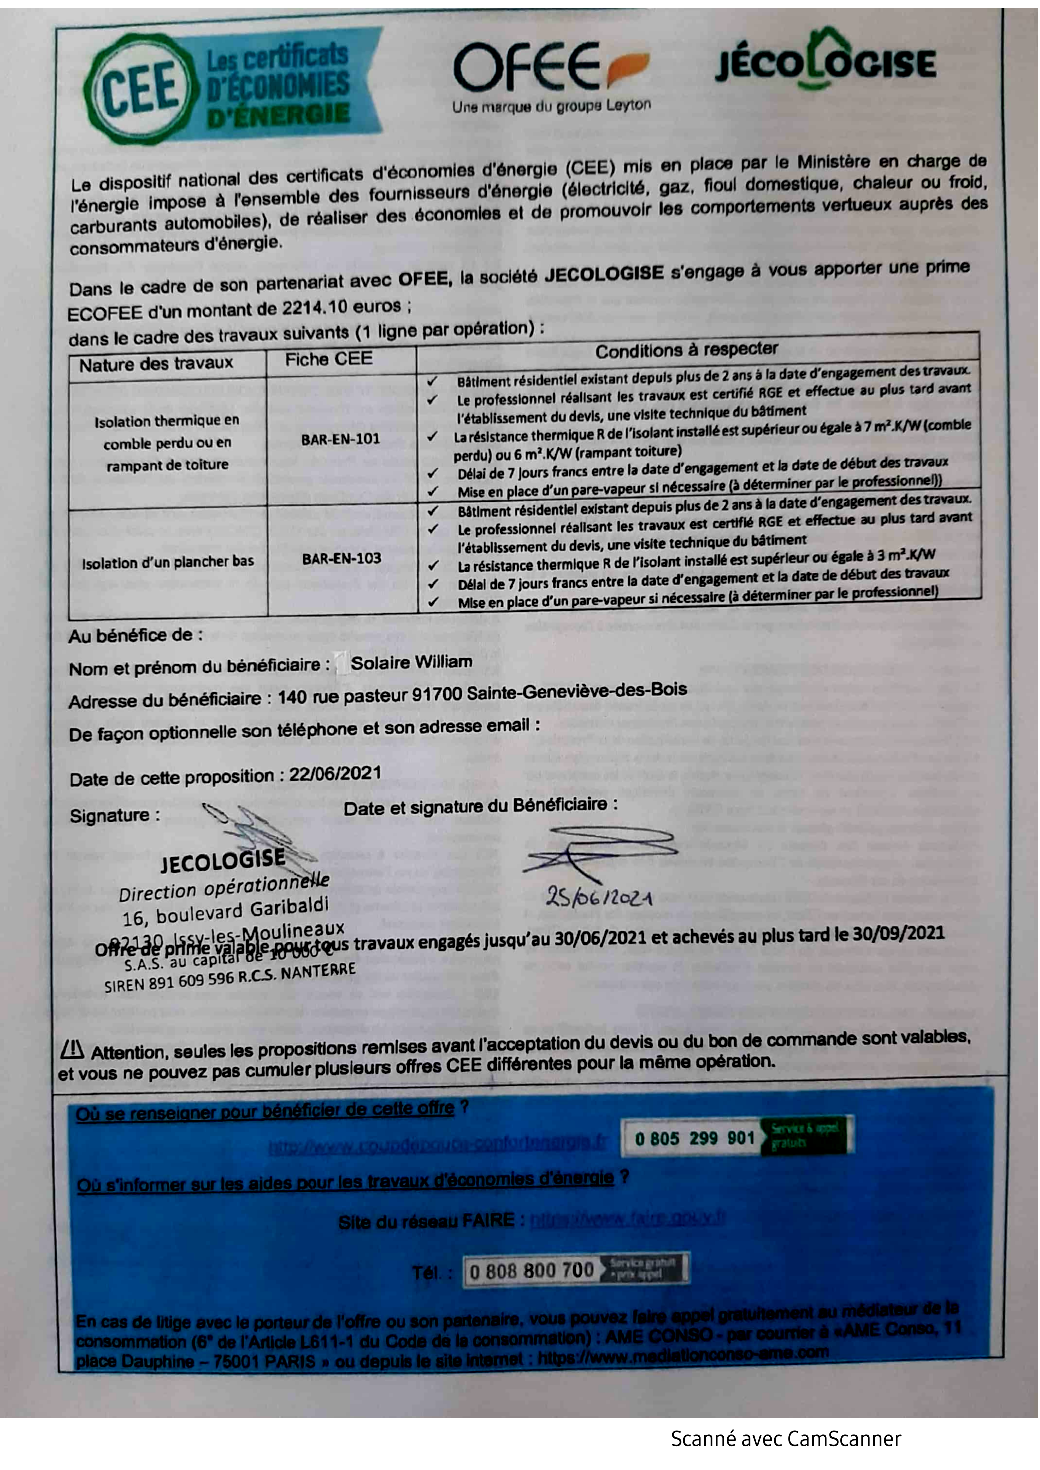

In [6]:
im_output = enhancer.enhance(2.0)
im_output

## Auto

In [7]:
import cv2
img = cv2.imread(file_path)

## CLAHE 

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread(file_path,0)

In [10]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))

In [11]:
cl1 = clahe.apply(img)

In [12]:
cv2.imwrite('clahe_2.png',cl1)

True

In [13]:
equ = cv2.equalizeHist(img,)
cv2.imwrite('hist_2.png',equ)

True

In [14]:
ret, th = cv2.threshold(img,
    0,  # threshold value, ignored when using cv2.THRESH_OTSU
    255,  # maximum value assigned to pixel values exceeding the threshold
     cv2.THRESH_OTSU)  # thresholding type

In [15]:
ret

122.0

In [16]:
cv2.imwrite('otsu_2.png',th)

True

## local otsu

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave

C:\Users\RBENOU~1\AppData\Local\Temp/ipykernel_26716/1611081984.py:13: UserWarning: local_otsu.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  imsave('local_otsu.png' ,img >= local_otsu)


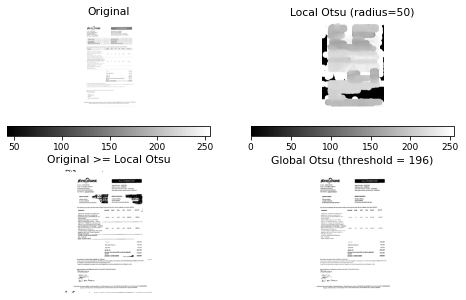

In [20]:
matplotlib.rcParams['font.size'] = 9


img = img_as_ubyte(imread(file_path, as_gray=True))

radius = 50
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img,)
global_otsu = img >= threshold_global_otsu
otsu_local = img >= local_otsu
imsave('local_otsu.png' ,otsu_local )

fig, ax = plt.subplots(2, 2, figsize=(8, 5))
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(img, cmap=plt.cm.gray),
           ax=ax1, orientation='horizontal')
ax1.set_title('Original')
ax1.axis('off')

fig.colorbar(ax2.imshow(local_otsu, cmap=plt.cm.gray),
           ax=ax2, orientation='horizontal')
ax2.set_title('Local Otsu (radius=%d)' % radius)
ax2.axis('off')

ax3.imshow(img >= local_otsu, cmap=plt.cm.gray)
ax3.set_title('Original >= Local Otsu' % threshold_global_otsu)
ax3.axis('off')

ax4.imshow(global_otsu, cmap=plt.cm.gray)
ax4.set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax4.axis('off')

plt.show()

In [33]:
otsu_local = img >= local_otsu
med_otsu = .7 * img + .3 * otsu_local * 255

In [34]:
imsave('med_otsu.png' ,med_otsu )

Lossy conversion from float64 to uint8. Range [30.099999999999998, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
